# Part2

## 파일 읽어오기

- 판다스는 다양한 형태의 외부 파일을 읽어와서 데이터프레임으로 변환하는 함수를 제공.
- 어떤 파일이든 판다스 객체인 데이터프레임으로 변환되고, 판다스의 모든 함수와 기능을 자유롭게 사용가능.
- 반대로 데이터프레임 형태를 다양한 유형의 파일로 저장 할수 있다.(CSV,TSV,JSON,EXEL 등등)

### CSV

- CSV파일: 데이터값을 , 로 구분하는 파일로 확장자는 .csv로 판다스에서는 read_csv() 함수를 사용해서 CSV파일을 데이터프레임으로 변환한다.
    - pandas.read_csv("파일경로(이름)") 으로 csv파일을 불러온다.
    - read_csv() 옵션 중 header 옵션은 데이터프레임의 '열 이름'으로 사용할 행을 지정한다.(기본값: 0행을 열로 지정)
    - index_col 옵션은 데이터프레임의 행 인덱스가 되는 열을 지정.(index_col=False -> 인덱스를 지정하지 않음, index_col='열이름' -> '행 주소'가 되는열을 지정)

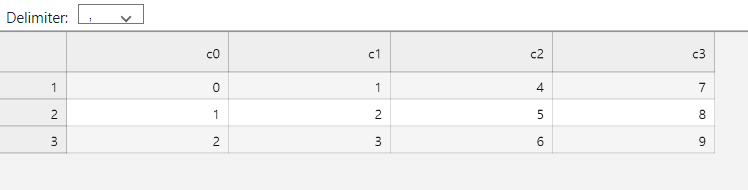

위에는 데이터가 ,로 구분되어있는 데이터를 쥬피터로 열었을때 테이블 형태로 나왔지만 상단에 Delimiter 구분자로 , 로 되어있는 것을 볼 수 있다.

In [2]:
import pandas as pd

In [7]:
#파일 읽어오기 (csv) 파일경로는 현재 쥬피터가 있는 경로에서 상대경로로 하여 변수로 저장
file_path = './read_csv_sample.csv'

# 파일 불러오기
df1 = pd.read_csv(file_path)
print(df1)
print('\n')

#header=None 옵션 해보기
df2 = pd.read_csv(file_path, header=None)
print(df2)
print('\n')

#index_col=None 옵션 해보기
df3 = pd.read_csv(file_path, index_col=None)
print(df3)
print('\n')

#index_col='c0'옵션 해보기
df4 = pd.read_csv(file_path, index_col='c0')
print(df4)


   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    0   1   2   3
0  c0  c1  c2  c3
1   0   1   4   7
2   1   2   5   8
3   2   3   6   9


   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    c1  c2  c3
c0            
0    1   4   7
1    2   5   8
2    3   6   9


header=None 옵션을 넣으면 0행 측 첫행이 열이름이 되지 않고 정수로 열 매김이 된다.   
index_col 옵션은 지정하지 않으면 정수 인덱싱이 되고, index_col='c0'로 하면 c0의 열이 인덱스가 된다.

CSV 파일에 따라서는 쉼표 대신 tab, 공백으로 텍스트를 구분하기도 한다. 이때 옵션으로 sep, delimiter 옵션을 알맞게 입력해야함.
- 내장 옵션
    - path: 파일의 위치 파일명 포함, url
    - sep(or delimiter): 텍스트 데이터를 필드별로 구문하는 문자
    - header: 열이름으로 사용될 행의 번호(기본값은 0) header가 없고 첫행 부터 데이터가 있는 경우 header=None으로 지정가능
    - index_col: 행 인덱스로 사용할 열의 번호 또는 열이름
    - names: 열 이름 으로 사용할 문자열 리스트
    - skiprows: 처음 몇 줄을 skip할 것인지 설정(숫자입력), skip하려는 행의 번호를 담은 리스트로 설정가능(ex:[1,3,5])
    - parse_dates: 날짜 텍스트를 datetime64로 변환 할 것인지 설정(기본값은 False)
    - skip_footer: 마지막 몇줄을 skip할것인지(숫자로 입력)
    - encoding 텍스트 인코딩 종류를 지정(ex: utf-8, cp949 등)

### Excel

- excel 파일 .xlsx 확장자로 행과 열은 데이터프레임의 행, 열로 일대일 대응된다.
- read_excel() 함수로 사용되고, 사용법은 read_csv() 와 비슷하다.

남북한 발전량을 정리한 통계자료를 활용하여 excel파일을 불러오기를 진행.

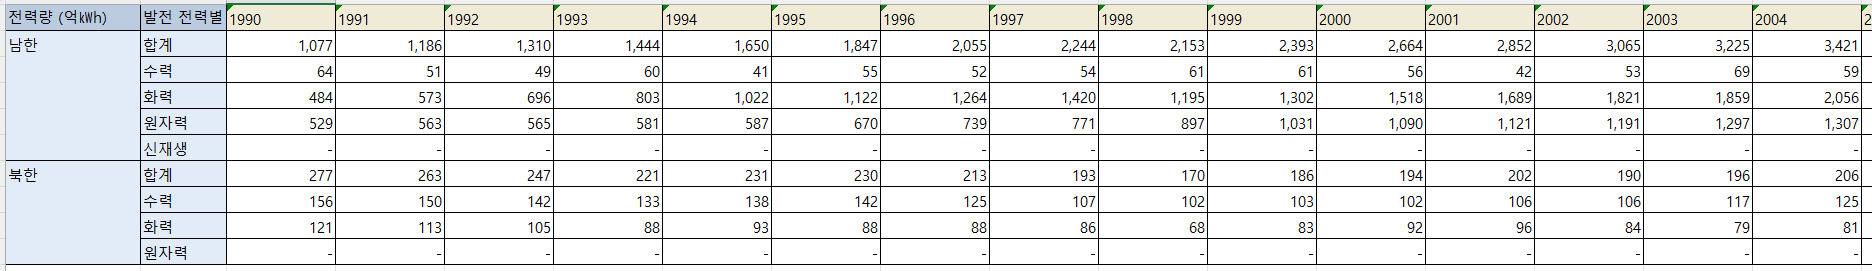

In [10]:
# read_excel() 함수로 데이터프레임 변환 
df1 = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl')            # header=0 (default 옵션)
df2 = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl', 
                    header=None)  # header=None 옵션

# 데이터프레임 출력
print(df1)
print('\n')
print(df2)

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

header=None 옵션을 추가하면 정수형 인덱스를 열 이름으로 자동 할당되는 것을 볼 수 있다.   
실행 환경에 따라서는 Excel 파일 데이터 추출을 지원하는 xlrd 라이브러리와 openpyxl 라이브러리를 설치가 필요. xlsx확장자를 갖는 경우, engine 옵션에 'openpyxl'을 지정한다. (xls인경우 'xlrd'를 engine옵션에 지정)

### JSON

- JSON 파일(확장자: .json)은 데이터 공유를 목적으로 개발된 특수한 파일 형식, 파이썬 딕셔너리 구조와 비슷하게 key:vlaue 구조를 가진다.
- pandas.read_json() 함수를 사용

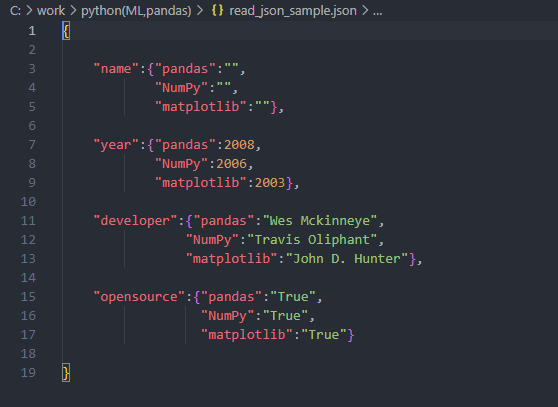

각 key값들이 열이름이 되고, value에 또 딕셔너리 형태로 key 는 인덱스가 되고, 그에 해당하는 value값은 데이터프레임 데이터값으로 들어간다.

In [12]:
# read_json() 함수로 데이터프레임 변환 
df = pd.read_json('./read_json_sample.json')  
print(df)
print('\n')
print(df.index)

           name  year        developer opensource
pandas           2008    Wes Mckinneye       True
NumPy            2006  Travis Oliphant       True
matplotlib       2003   John D. Hunter       True


Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')


### HTML

- 판다스 read_html() 함수는 HTML 웹체이지에 있는 <table> 태그에서 표 형식의 데이터를 모두 찾아서 데이터프레임으로 변환.
- 표 데이터들은 각각 별도의 데이터프레임으로 변환되어 여러개의 데이터프레임을 원소로 갖는리스트가 반환


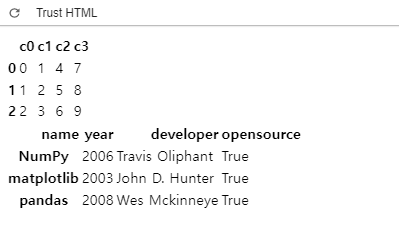

이러한 형태를 같는 html 파일에서 두 테이블을 데이터 프레임으로 반환을 할것.

In [3]:
# HTML 파일 경로 or 웹 페이지 주소를 url 변수에 저장
url ='./sample.html'

# HTML 웹페이지의 표(table)를 가져와서 데이터프레임으로 변환 
tables = pd.read_html(url)

# 표(table)의 개수 확인
print(len(tables))
print('\n')

# tables 리스트의 원소를 iteration하면서 각각 화면 출력
for i in range(len(tables)):
    print("tables[%s]" % i)
    print(tables[i])
    print('\n')

# 파이썬 패키지 정보가 들어 있는 두 번째 데이터프레임을 선택하여 df 변수에 저장
df = tables[1] 

# 'name' 열을 인덱스로 지정
df.set_index(['name'], inplace=True)
print(df)

2


tables[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


tables[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


변수 tables에는 2개의 데이터프레임(표)을 원소로 갖는 리스트가 저장이 되고, 두번째 테이블을 set_index() 메소드를 사용하여 df의 'name'열을 새로운 행 인덱스로 설정